In [160]:
'''

Password - 1000k unique values for password collected online

Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..
Strength of the password based on rules(such as containing digits, special symbols , etc.)


The passwords used in our analysis are from 000webhost leak that is available online

'''

'\n\nPassword - 1000k unique values for password collected online\n\nStrength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..\nStrength of the password based on rules(such as containing digits, special symbols , etc.)\n\n\nThe passwords used in our analysis are from 000webhost leak that is available online\n\n'

# 1.. read data from SQL Database !

In [161]:
## importing all necessary libraries ..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
import sqlite3

In [163]:
## u have your data into 'password_Data.sqlite' which has table has 'Users' 
## now u can read data from this db file 'password_Data.sqlite' using sqlite3 & pandas

In [164]:
# very first u have to create a SQL connection to our SQLite database
con = sqlite3.connect(r"/data/rrjha/abhishek/Password_strentgh_checker/password_data.sqlite")

In [165]:
#### check online its table name on https://sqliteonline.com/
data = pd.read_sql_query("SELECT * FROM Users" , con)

In [166]:
data.shape

(100000, 3)

In [167]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


# 2.. Doing basic data cleaning !

In [168]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

### Removing ir-relevant features !

In [169]:
data.drop(["index"] , axis=1 , inplace=True)

In [170]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


### Check duplicate rows

In [171]:
data.duplicated().sum()

np.int64(0)

### check missing values in columns 

In [172]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [173]:
data.isnull().any().sum() ## it means 0 feature have NAN values

np.int64(0)

### check data-types of every feature !

In [174]:
data.dtypes

password    object
strength     int64
dtype: object

### checking whether "strength" feature has ir-relevant values or not !

In [175]:
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [176]:
data["strength"].unique()

array([1, 2, 0])

# 3.. Performing Semantic Analysis !
    e.g ,,      
          
          a) How many password textual actually holds only numeric characters ?
          b) How many password textual actually holds only Upper-case character ? 
          
          c) How many password textual actually holds only alphabet ?
          d) How many password textual actually holds alpha-numeric character ? 
          e) How many password textual actually holds title-case character ? 
          
          f) How many password textual actually holds some special special character ? 
          
          

In [177]:
data.columns

Index(['password', 'strength'], dtype='object')

In [178]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [179]:
data["password"][0]

'zxe870819'

In [180]:
type(data["password"][0])

str

### a) How many password textual actually holds only numeric characters ?

In [181]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [182]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [183]:
data[data["password"].str.isnumeric()].shape  ### only 26 people have set their password as only number !

(26, 2)

### b) How many password textual actually holds only Upper-case character ? 

In [184]:
data[data["password"].str.isupper()]

### around 1500 users have their password as only capital letters !

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


### c) How many password textual actually holds only alphabet ? 

In [185]:
data[data["password"].str.isalpha()].shape

### around 50 users have their password as alphabet letters only !

(50, 2)

### d) How many password textual actually holds alpha-numeric character ? 

In [186]:
data[data["password"].str.isalnum()]

### most of the users around 97K have their password as alpha-numeric..

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


### e) How many password textual actually holds title-case character ? 

In [187]:
data[data["password"].str.istitle()]

### around 932 users have their password having first alphabet capital !

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


### f) How many password textual actually holds special character ? 

In [188]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [189]:
import string

In [190]:
string.punctuation ## all punctuations defined in "string" package !

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [191]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [192]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [193]:
data[data["password"].apply(find_semantics)==1]

## ie , 2663 observations have special characters in between them ..
## 2.6% people password actually uses special character in their password ..

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


## 4.. Applying Feature Engineering !

In [194]:
'''

we have password strength so you can do a quick google search to check what features password depends on:-
It depends on 5 factors :

    Length of password
    Frequency of Lowercase Characters
    Frequency of Uppercase Characters
    Frequency of Numeric Characters
    Frequency of Special Characters

These will be the result of the google search to find factors effecting strength of password..


'''

'\n\nwe have password strength so you can do a quick google search to check what features password depends on:-\nIt depends on 5 factors :\n\n    Length of password\n    Frequency of Lowercase Characters\n    Frequency of Uppercase Characters\n    Frequency of Numeric Characters\n    Frequency of Special Characters\n\nThese will be the result of the google search to find factors effecting strength of password..\n\n\n'

#### length of every Password 

In [195]:
data["password"][0]

'zxe870819'

In [196]:
len(data["password"][0]) 

9

In [197]:
data["length"] = data["password"].str.len() 

#### Frequency of Lowercase Characters :

In [198]:
password = "Abhi99"

In [199]:
[char for char in password if char.islower()]

['b', 'h', 'i']

In [200]:
len([char for char in password if char.islower()])

3

In [201]:
len([char for char in password if char.islower()])/len(password)

0.5

In [202]:
'''

Q..->> why we are diving each value by its Total length or why we are normalizing frequency ? 

Ans : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could 
also be high , so lets normalise it in the range between 0 to 1


'''

'\n\nQ..->> why we are diving each value by its Total length or why we are normalizing frequency ? \n\nAns : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could \nalso be high , so lets normalise it in the range between 0 to 1\n\n\n'

In [203]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

#### Frequency of Uppercase Characters :

In [204]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

#### Frequency of Numeric Characters :

In [205]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [206]:
### applying user-defined functions ..

In [207]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [208]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


#### Frequency of Special-case Characters :

In [209]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [210]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [211]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [212]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## noromalising "special_char_freq" feature 

In [213]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


## 5.. Performing Descriptive Statistics !

In [214]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [215]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [216]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [217]:
'''

Just taking a rough look at the above stats I can say the following:-



->> Higher the length, Higher the strength

->> In case on alphabet frequency higher is not better. 
    Probably because it'll not be a strong password if max portion is occupied by just alphabets..
    Password has more strength if the char types are spread in decent proportions.



'''

"\n\nJust taking a rough look at the above stats I can say the following:-\n\n\n\n->> Higher the length, Higher the strength\n\n->> In case on alphabet frequency higher is not better. \n    Probably because it'll not be a strong password if max portion is occupied by just alphabets..\n    Password has more strength if the char types are spread in decent proportions.\n\n\n\n"

In [218]:
#### Similarly , if u need viz representation of above output : (u can refer boxplot)
## bcz boxplot basically gives us 5-point summary of data !

In [219]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

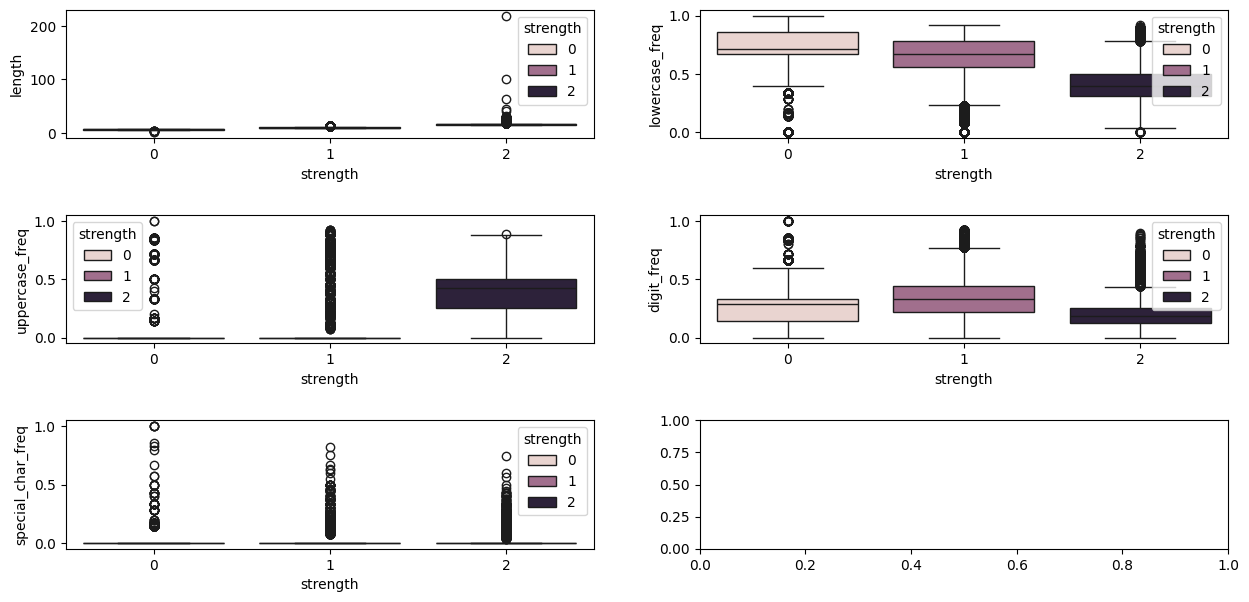

In [220]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [221]:
'''
Insights :
Regarding the insights we can say that:-



->> Higher Lowercase frequency is seen in low strength passwords. 
    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.


->> In digit_freq there is a split of majority poplutation of strength 1 and 2 
    but for 0 and 1 strength , there is overlap so no too much to say there. 
    But we can say a nicely propotioned password is good..
    
    
->> In upper_freq , there is a trend but not as strong as length or lower_freq..
    
    
->> Similar but stronger same trend as above in special_freq.

->> Higher strength passwords have more type breaks.


'''

'\nInsights :\nRegarding the insights we can say that:-\n\n\n\n->> Higher Lowercase frequency is seen in low strength passwords. \n    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.\n\n\n->> In digit_freq there is a split of majority poplutation of strength 1 and 2 \n    but for 0 and 1 strength , there is overlap so no too much to say there. \n    But we can say a nicely propotioned password is good..\n    \n    \n->> In upper_freq , there is a trend but not as strong as length or lower_freq..\n    \n    \n->> Similar but stronger same trend as above in special_freq.\n\n->> Higher strength passwords have more type breaks.\n\n\n'

## 6.. Feature Importance ! ( How to figure out imp. feature )

In [222]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [223]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [224]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

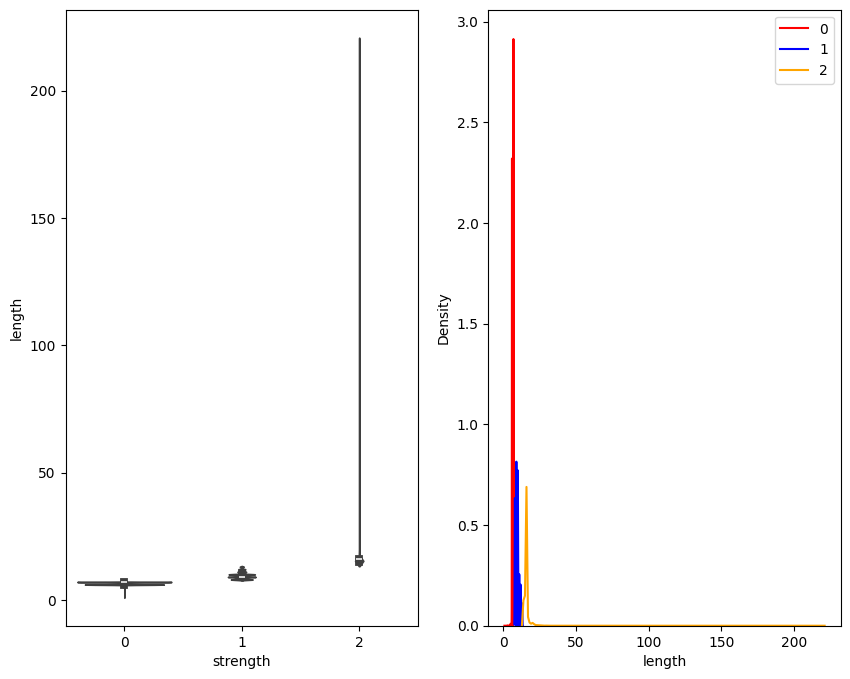

In [225]:
get_dist(data , "length")

In [226]:
### we have few overlappping region in distribution plot 
### when class is 2 , we have higher value of 'length' than class 1 & class 0

## it means 'length' is a interesting feature as we have very less overlapping region

## similarly from violinplot ,we will say on account of less overlappping , 
## this feature 'length' is amazing & useful in determining the strength


In [227]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

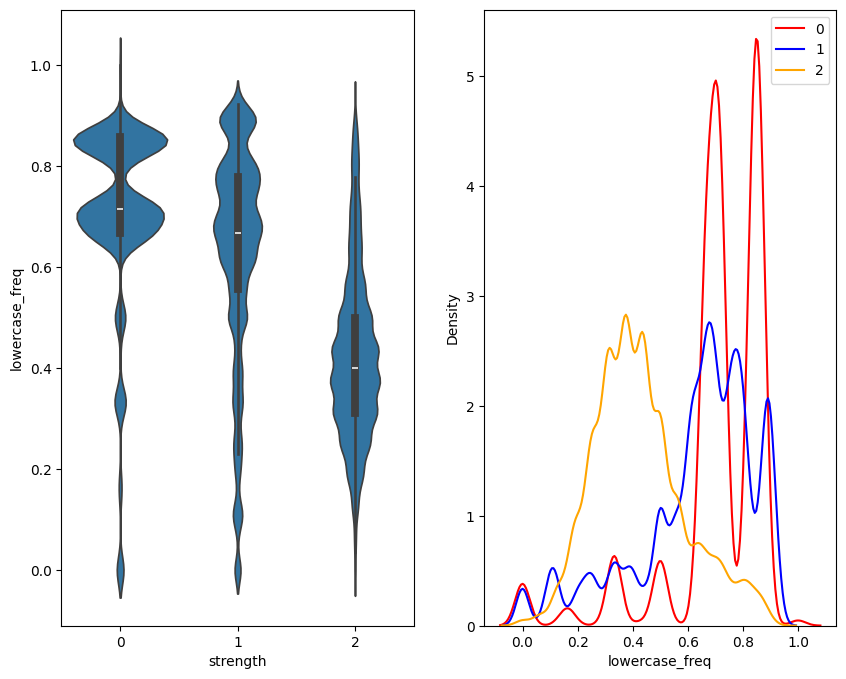

In [228]:
get_dist(data , 'lowercase_freq')

In [229]:
### we have some kind of overlappping region in distribution plot 
### when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

## it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

## similarly from violinplot ,we will say on account of such overlappping , 
## when class is 2 we have less value of 'lower_freq' than class 1 & class 0
## this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

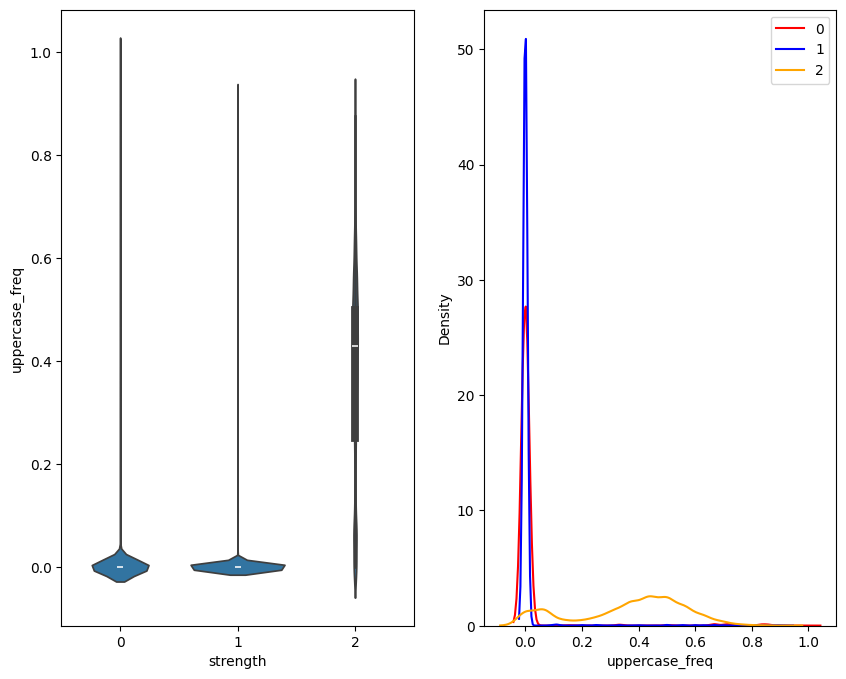

In [230]:
get_dist(data , 'uppercase_freq')

In [231]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

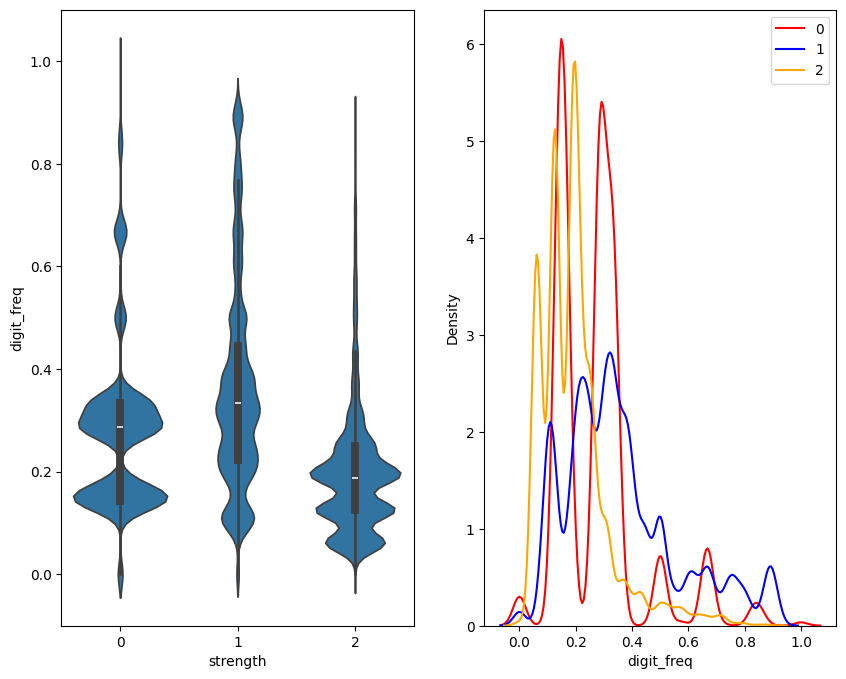

In [232]:
get_dist(data , 'digit_freq')

In [233]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

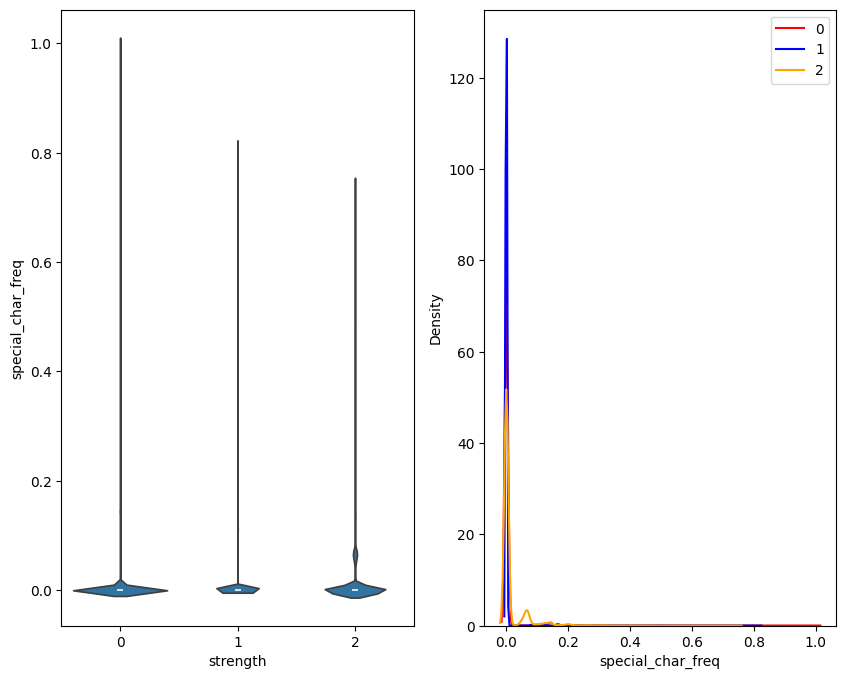

In [234]:
get_dist(data , 'special_char_freq')

In [235]:
'''

Key Insight : It ives us idea that length & lowercase freq are important features..


'''


'\n\nKey Insight : It ives us idea that length & lowercase freq are important features..\n\n\n'

## 7.. Applying TF_IDF on data

In [236]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [237]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [238]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel 

In [239]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
73523,gcbo7fb,0,7,0.857,0.000,0.143,0.0
27417,krasimir123,1,11,0.727,0.000,0.273,0.0
37931,branco007,1,9,0.667,0.000,0.333,0.0
69695,ah6wx2y,0,7,0.714,0.000,0.286,0.0
48625,bovow845,1,8,0.625,0.000,0.375,0.0
...,...,...,...,...,...,...,...
80003,jdg192317,1,9,0.333,0.000,0.667,0.0
10148,aa196528aa,1,10,0.400,0.000,0.600,0.0
39854,884ekyCeXameNO,2,14,0.500,0.286,0.214,0.0
73857,mossaves1,1,9,0.889,0.000,0.111,0.0


In [240]:
x = list(dataframe["password"])

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

In [242]:
#### as password is a series of chars , we have to calculate TF_IDF values of each char 
#### Thats why we have to split our password as-->>
#### kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']


### then we can compute Tf-Idf value of each character like Tf-IDF value of k , Tf-IDF value of z


In [243]:
vectorizer = TfidfVectorizer(analyzer="char")

In [244]:
X = vectorizer.fit_transform(x)

In [245]:
X.shape


## ie (100000,1) passwords gets represented using (100000, 99)
## ie each password gets represented using 99 dimensions ..

## note : in your case , this dimension might be changed !

(100000, 99)

In [246]:
dataframe["password"].shape

(100000,)

In [247]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 842571 stored elements and shape (100000, 99)>

In [248]:
X.toarray()  ### to get entire matrix of TF-IDF for 100000 passwords ..

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(100000, 99))

In [249]:
X.toarray()[0] ## TF-IDF scores of Ist row

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.323447  , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6912436 , 0.32293015,
       0.        , 0.        , 0.37682002, 0.3272729 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25333685, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [250]:
dataframe["password"]

73523           gcbo7fb
27417       krasimir123
37931         branco007
69695           ah6wx2y
48625          bovow845
              ...      
80003         jdg192317
10148        aa196528aa
39854    884ekyCeXameNO
73857         mossaves1
32361        cawleydog1
Name: password, Length: 100000, dtype: object

In [251]:
len(vectorizer.get_feature_names_out())

99

In [252]:
### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

## ie these are the various chars to which different TF-IDF values are assigned for 100000 passwords ..

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [253]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [254]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8.. Applying Machine Learning algorithm !

In [255]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [256]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [257]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [258]:
y = dataframe["strength"]

#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [260]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [261]:
X_train.shape

(80000, 101)

In [262]:
y_train.shape

(80000,)

In [263]:
# Import additional classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import time
import warnings
warnings.filterwarnings('ignore')



In [264]:
# Your existing code up to this point remains exactly the same
# X = df2 (your features), y = dataframe["strength"] (your target)

# Split the data (using your existing split)
# X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20, random_state=42)

# Define classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
}

In [265]:
# For comparison, also try RandomForest with different parameters
rf_optimized = RandomForestClassifier(
    n_estimators=200, 
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [266]:
classifiers['Random Forest (Optimized)'] = rf_optimized

# Store results
results = {}
predictions = {}
training_times = {}

print("="*60)
print("COMPARING DIFFERENT CLASSIFIERS")
print("="*60)

COMPARING DIFFERENT CLASSIFIERS


In [267]:
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Record training time
    training_times[name] = time.time() - start_time
    
    # Make predictions
    y_pred = clf.predict(X_test)
    predictions[name] = y_pred
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"✓ Accuracy: {accuracy:.4f}")
    print(f"✓ Training time: {training_times[name]:.2f} seconds")
    
    # Quick cross-validation score (optional, can be slow for large datasets)
    if name not in ['Gradient Boosting']:  # Skip CV for slow algorithms
        cv_scores = cross_val_score(clf, X_train[:10000], y_train[:10000], cv=3, scoring='accuracy')
        print(f"✓ CV Score (3-fold): {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")


Training Logistic Regression...
✓ Accuracy: 0.8157
✓ Training time: 7.91 seconds
✓ CV Score (3-fold): 0.7985 (+/- 0.0049)

Training Random Forest...
✓ Accuracy: 0.9043
✓ Training time: 0.84 seconds
✓ CV Score (3-fold): 0.8805 (+/- 0.0055)

Training Decision Tree...
✓ Accuracy: 0.8729
✓ Training time: 1.48 seconds
✓ CV Score (3-fold): 0.8327 (+/- 0.0089)

Training Gradient Boosting...
✓ Accuracy: 0.9388
✓ Training time: 160.13 seconds

Training Random Forest (Optimized)...
✓ Accuracy: 0.9303
✓ Training time: 1.28 seconds
✓ CV Score (3-fold): 0.8955 (+/- 0.0041)


In [268]:
print("\n" + "="*60)
print("SUMMARY - Model Performance Comparison")
print("="*60)
# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for i, (name, accuracy) in enumerate(sorted_results, 1):
    print(f"{i}. {name:<30} Accuracy: {accuracy:.4f} | Time: {training_times[name]:.2f}s")


SUMMARY - Model Performance Comparison
1. Gradient Boosting              Accuracy: 0.9388 | Time: 160.13s
2. Random Forest (Optimized)      Accuracy: 0.9303 | Time: 1.28s
3. Random Forest                  Accuracy: 0.9043 | Time: 0.84s
4. Decision Tree                  Accuracy: 0.8729 | Time: 1.48s
5. Logistic Regression            Accuracy: 0.8157 | Time: 7.91s


(0.0, 1.0)

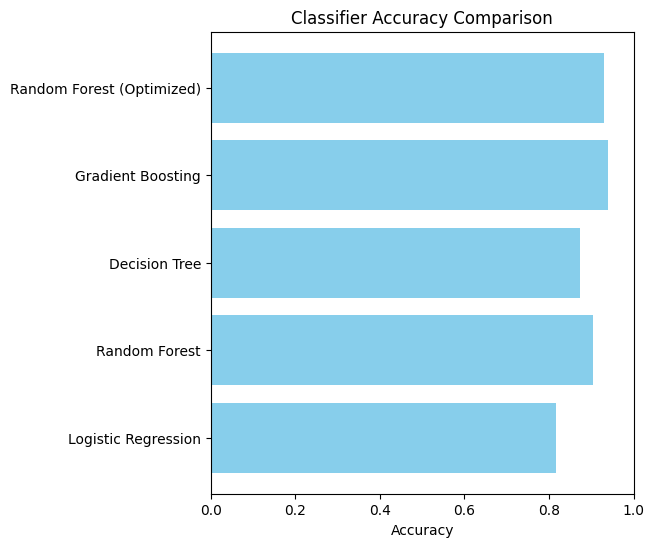

In [269]:
# Plot comparison
plt.figure(figsize=(12, 6))
names = list(results.keys())
accuracies = list(results.values())
times = [training_times[n] for n in names]

# Create subplot for accuracy
plt.subplot(1, 2, 1)
bars = plt.barh(names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xlim(0, 1)

In [272]:
# Detailed report for best model (usually RandomForest)
best_model_name = sorted_results[0][0]
best_model = classifiers[best_model_name]
y_pred_best = predictions[best_model_name]

print(f"\n" + "="*60)
print(f"DETAILED REPORT FOR BEST MODEL: {best_model_name}")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


DETAILED REPORT FOR BEST MODEL: Gradient Boosting
Accuracy: 0.9388

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2728
           1       0.94      0.98      0.96     14715
           2       0.95      0.92      0.93      2557

    accuracy                           0.94     20000
   macro avg       0.94      0.88      0.90     20000
weighted avg       0.94      0.94      0.94     20000



In [273]:
# Feature Importance for RandomForest (if it's the best or for analysis)
if 'Random Forest' in best_model_name or 'Random Forest (Optimized)' in best_model_name:
    feature_importance = pd.DataFrame({
        'feature': df2.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 20 Most Important Features:")
    print(feature_importance.head(20))
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['importance'].values)
    plt.yticks(range(len(top_features)), top_features['feature'].values)
    plt.xlabel('Importance')
    plt.title('Top 20 Feature Importances (Random Forest)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

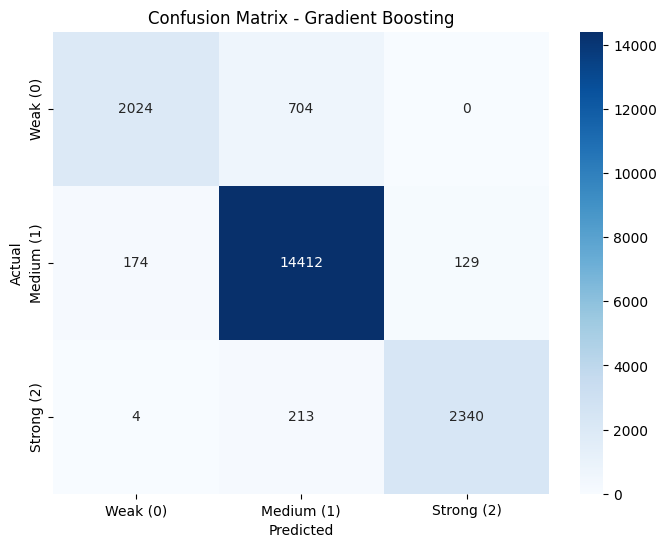

In [274]:
# Confusion Matrix for best model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Weak (0)', 'Medium (1)', 'Strong (2)'],
            yticklabels=['Weak (0)', 'Medium (1)', 'Strong (2)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

In [275]:
# Enhanced prediction function that lets you choose which model to use
def predict_password(password, model=best_model, vectorizer=vectorizer):
    """
    Predict password strength using trained model
    """
    # Convert password to TF-IDF features
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    # Calculate structural features
    length_pass = len(password)
    lowercase_count = len([char for char in password if char.islower()])
    length_normalised_lowercase = lowercase_count / length_pass if length_pass > 0 else 0
    
    # Combine features
    new_matrix = np.append(sample_matrix.toarray(), 
                          (length_pass, length_normalised_lowercase)).reshape(1, 101)
    
    # Predict
    result = model.predict(new_matrix)[0]
    
    # Return human-readable result
    if result == 0:
        return "🔴 WEAK password"
    elif result == 1:
        return "🟡 MEDIUM password"
    else:
        return "🟢 STRONG password"





In [276]:
# Test with multiple passwords
test_passwords = [
    "123456",
    "password",
    "abc123",
    "P@ssw0rd",
    "MyStr0ngP@ssw0rd2024!",
    "aaaaaaaaaaaaaaaa",
    "!@#$%^&*()",
    "correct-horse-battery-staple"
]

In [277]:
print("\n" + "="*60)
print(f"TESTING {best_model_name} ON SAMPLE PASSWORDS")
print("="*60)
for pwd in test_passwords:
    result = predict_password(pwd, best_model, vectorizer)
    print(f"'{pwd:<30}' → {result}")


TESTING Gradient Boosting ON SAMPLE PASSWORDS
'123456                        ' → 🟡 MEDIUM password
'password                      ' → 🟡 MEDIUM password
'abc123                        ' → 🟡 MEDIUM password
'P@ssw0rd                      ' → 🟡 MEDIUM password
'MyStr0ngP@ssw0rd2024!         ' → 🟢 STRONG password
'aaaaaaaaaaaaaaaa              ' → 🔴 WEAK password
'!@#$%^&*()                    ' → 🔴 WEAK password
'correct-horse-battery-staple  ' → 🟢 STRONG password


In [278]:
# !pip install xgboost 

# Training and Testing with XGBoost

In [279]:
# Alternative approach - convert to numpy arrays for XGBoost
try:
    from xgboost import XGBClassifier
    
    print("\n" + "="*60)
    print("Training XGBoost (using numpy arrays)...")
    
    # Convert to numpy arrays to avoid column name issues
    X_train_np = X_train.values
    X_test_np = X_test.values
    
    xgb_model = XGBClassifier(
        n_estimators=100, 
        max_depth=6, 
        learning_rate=0.1, 
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False,
        verbosity=0
    )
    
    start_time = time.time()
    xgb_model.fit(X_train_np, y_train)
    xgb_time = time.time() - start_time
    
    xgb_pred = xgb_model.predict(X_test_np)
    xgb_acc = accuracy_score(y_test, xgb_pred)
    
    print(f"✓ XGBoost Accuracy: {xgb_acc:.4f}")
    print(f"✓ Training time: {xgb_time:.2f} seconds")
    
    # Add to comparison
    classifiers['XGBoost'] = xgb_model
    results['XGBoost'] = xgb_acc
    training_times['XGBoost'] = xgb_time
    
except ImportError:
    print("XGBoost not installed")
except Exception as e:
    print(f"Error: {e}")


Training XGBoost (using numpy arrays)...
✓ XGBoost Accuracy: 0.9405
✓ Training time: 113.29 seconds


# 📊 FINAL MODEL COMPARISON


📊 FINAL MODEL COMPARISON (Updated)

Rank  Model                          Accuracy     Time (s)  
----------------------------------------------------------------------
1     XGBoost                        0.9405   113.3
2     Gradient Boosting              0.9388   160.1
3     Random Forest (Optimized)      0.9303   1.3
4     Random Forest                  0.9043   0.8
5     Decision Tree                  0.8729   1.5
6     Logistic Regression            0.8157   7.9


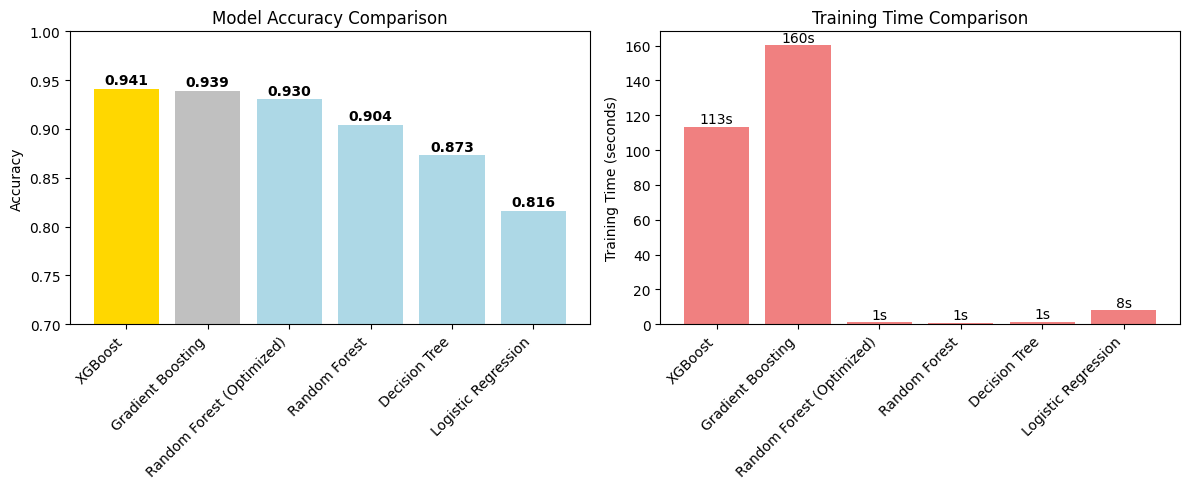


🔍 DETAILED COMPARISON: Gradient Boosting vs XGBoost

▶ Gradient Boosting
----------------------------------------
  Accuracy: 0.9388
  Confusion Matrix:
    Weak:    2024 correct,  704 misclassified
    Medium:  14412 correct,  303 misclassified
    Strong:  2340 correct,  217 misclassified

▶ XGBoost
----------------------------------------
  Accuracy: 0.9405
  Confusion Matrix:
    Weak:    2083 correct,  645 misclassified
    Medium:  14418 correct,  297 misclassified
    Strong:  2310 correct,  247 misclassified

📈 TOP 15 MOST IMPORTANT FEATURES (XGBoost)
feature  importance
      q    0.117423
      w    0.046029
      r    0.038068
      z    0.036629
      1    0.036089
      2    0.034414
      g    0.030350
      3    0.027907
      d    0.027627
      9    0.027253
      n    0.026135
      t    0.026077
      y    0.025776
      4    0.024382
      m    0.024132


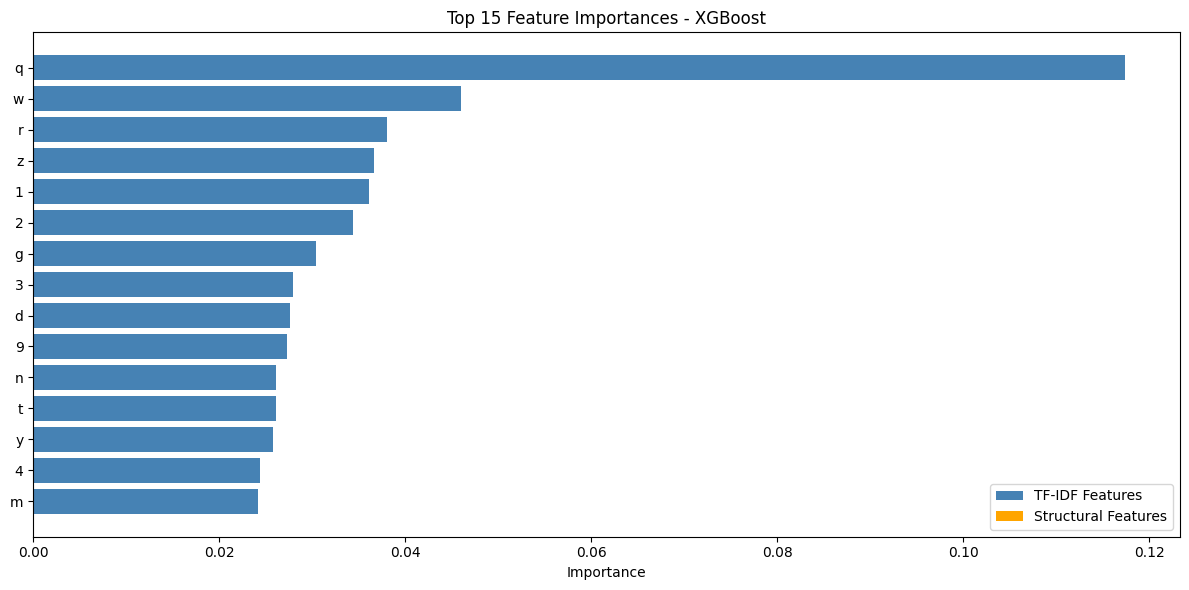


📊 Feature Type Importance:
   TF-IDF features total importance: 0.998
   Structural features total importance: 0.002
   Ratio (Structural/TF-IDF): 0.00x


In [280]:
# Compare all models including new ones
print("\n" + "="*70)
print("📊 FINAL MODEL COMPARISON (Updated)")
print("="*70)

# Add XGBoost results to your results dictionary if not already there
if 'XGBoost' not in results:
    results['XGBoost'] = xgb_acc
    training_times['XGBoost'] = xgb_time

# Sort all results
all_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print(f"\n{'Rank':<5} {'Model':<30} {'Accuracy':<12} {'Time (s)':<10}")
print("-"*70)
for i, (name, acc) in enumerate(all_results, 1):
    time = training_times.get(name, 0)
    print(f"{i:<5} {name:<30} {acc:.4f}{' ' * (8 - len(f'{acc:.4f}'))} {time:.1f}")

# Visual comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
names = [r[0] for r in all_results]
accs = [r[1] for r in all_results]
colors = ['gold' if i==0 else 'silver' if i==1 else 'lightblue' for i in range(len(names))]
plt.bar(range(len(names)), accs, color=colors)
plt.xticks(range(len(names)), names, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1.0)
for i, acc in enumerate(accs):
    plt.text(i, acc + 0.005, f'{acc:.3f}', ha='center', fontweight='bold')

plt.subplot(1, 2, 2)
times = [training_times.get(name, 0) for name in names]
plt.bar(range(len(names)), times, color='lightcoral')
plt.xticks(range(len(names)), names, rotation=45, ha='right')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
for i, t in enumerate(times):
    if t > 0:
        plt.text(i, t + 2, f'{t:.0f}s', ha='center')

plt.tight_layout()
plt.show()

# Detailed comparison of top 2 models
print("\n" + "="*70)
print("🔍 DETAILED COMPARISON: Gradient Boosting vs XGBoost")
print("="*70)

models_to_compare = {
    'Gradient Boosting': classifiers.get('Gradient Boosting'),
    'XGBoost': classifiers.get('XGBoost')
}

for name, model in models_to_compare.items():
    if model is None:
        continue
    
    print(f"\n▶ {name}")
    print("-" * 40)
    
    # Make predictions
    if name == 'XGBoost':
        # XGBoost needs numpy arrays
        y_pred = model.predict(X_test.values)
    else:
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"  Accuracy: {acc:.4f}")
    
    # Per-class metrics
    cm = confusion_matrix(y_test, y_pred)
    print("  Confusion Matrix:")
    print(f"    Weak:    {cm[0,0]:4d} correct, {cm[0,1]+cm[0,2]:4d} misclassified")
    print(f"    Medium:  {cm[1,1]:4d} correct, {cm[1,0]+cm[1,2]:4d} misclassified")
    print(f"    Strong:  {cm[2,2]:4d} correct, {cm[2,0]+cm[2,1]:4d} misclassified")

# FIXED: Feature importance for XGBoost
if hasattr(xgb_model, 'feature_importances_'):
    print("\n" + "="*70)
    print("📈 TOP 15 MOST IMPORTANT FEATURES (XGBoost)")
    print("="*70)
    
    # Get feature names from training data
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        # If X_train is numpy array, create generic feature names
        feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
    
    xgb_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(xgb_importance.head(15).to_string(index=False))
    
    # Plot with color coding by feature type
    plt.figure(figsize=(12, 6))
    top15 = xgb_importance.head(15)
    
    # Color code features
    colors = []
    for feat in top15['feature']:
        feat_str = str(feat)
        if any(x in feat_str for x in ['length', 'unique', 'type', 'freq', 'count', 'digit', 'upper', 'lower', 'special']):
            colors.append('orange')  # structural features
        else:
            colors.append('steelblue')  # TF-IDF features
    
    plt.barh(range(len(top15)), top15['importance'].values, color=colors)
    plt.yticks(range(len(top15)), top15['feature'].values)
    plt.xlabel('Importance')
    plt.title('Top 15 Feature Importances - XGBoost')
    plt.gca().invert_yaxis()
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='steelblue', label='TF-IDF Features'),
        Patch(facecolor='orange', label='Structural Features')
    ]
    plt.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate importance by feature type
    structural_pattern = 'length|unique|type|freq|count|digit|upper|lower|special'
    tfidf_imp = xgb_importance[~xgb_importance['feature'].astype(str).str.contains(structural_pattern, regex=True, na=False)]['importance'].sum()
    struct_imp = xgb_importance[xgb_importance['feature'].astype(str).str.contains(structural_pattern, regex=True, na=False)]['importance'].sum()
    
    print(f"\n📊 Feature Type Importance:")
    print(f"   TF-IDF features total importance: {tfidf_imp:.3f}")
    print(f"   Structural features total importance: {struct_imp:.3f}")
    if tfidf_imp > 0:
        print(f"   Ratio (Structural/TF-IDF): {struct_imp/tfidf_imp:.2f}x")


📊 STRUCTURAL FEATURES IMPORTANCE

Structural Feature Importance (XGBoost):
feature  importance
 length    0.000794


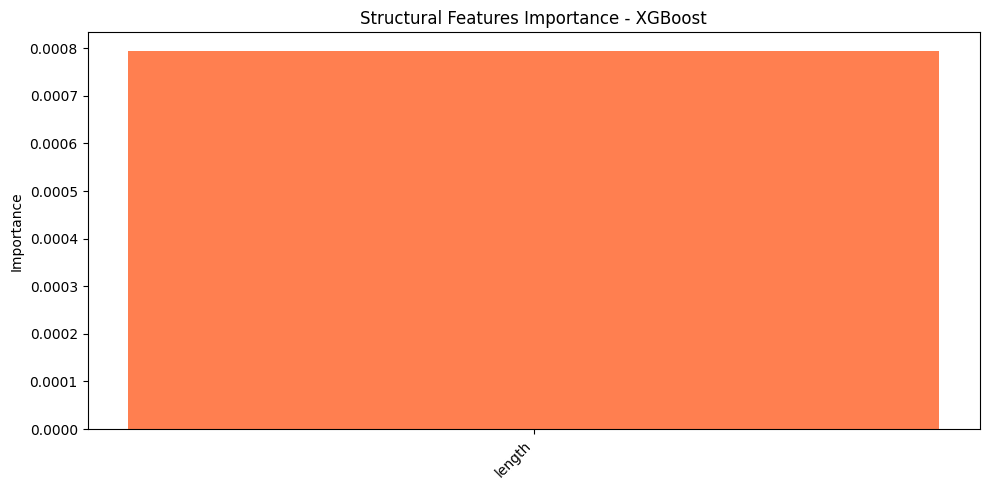

In [281]:
# Focus on structural features only
print("\n" + "="*70)
print("📊 STRUCTURAL FEATURES IMPORTANCE")
print("="*70)

structural_features = ['length', 'unique_ratio', 'type_count', 'digit_freq', 
                       'upper_freq', 'lower_freq', 'special_freq', 
                       'digit_count', 'upper_count', 'lower_count', 'special_count', 'unique_chars']

if hasattr(xgb_model, 'feature_importances_') and hasattr(X_train, 'columns'):
    # Get importance for structural features
    struct_importance = []
    for feat in structural_features:
        if feat in X_train.columns:
            idx = list(X_train.columns).index(feat)
            struct_importance.append({
                'feature': feat,
                'importance': xgb_model.feature_importances_[idx]
            })
    
    if struct_importance:
        struct_df = pd.DataFrame(struct_importance).sort_values('importance', ascending=False)
        print("\nStructural Feature Importance (XGBoost):")
        print(struct_df.to_string(index=False))
        
        # Plot
        plt.figure(figsize=(10, 5))
        plt.bar(struct_df['feature'], struct_df['importance'], color='coral')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Importance')
        plt.title('Structural Features Importance - XGBoost')
        plt.tight_layout()
        plt.show()

# Saving The Model

In [282]:
import pickle
import joblib
from datetime import datetime

# Determine which model is best
best_model_name = all_results[0][0]  # Gets top model from your sorted results
best_model = classifiers[best_model_name]
best_accuracy = all_results[0][1]

print("="*70)
print(f"💾 SAVING BEST MODEL: {best_model_name}")
print("="*70)
print(f"✓ Accuracy: {best_accuracy:.4f}")
print(f"✓ Training time: {training_times.get(best_model_name, 0):.1f}s")

# Create a comprehensive model package
model_package = {
    'model': best_model,
    'model_name': best_model_name,
    'accuracy': best_accuracy,
    'vectorizer': vectorizer,
    'structural_features': ['length', 'lowercase_freq'],  # Your key features
    'feature_names': list(X_train.columns) if hasattr(X_train, 'columns') else None,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'version': '1.0'
}

# Save the model package
filename = f'password_strength_{best_model_name}_{best_accuracy:.4f}.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model_package, f)

print(f"\n✅ Model saved as: {filename}")
print(f"📦 Package includes: model, vectorizer, feature info, metadata")

💾 SAVING BEST MODEL: XGBoost
✓ Accuracy: 0.9405
✓ Training time: 113.3s

✅ Model saved as: password_strength_XGBoost_0.9405.pkl
📦 Package includes: model, vectorizer, feature info, metadata


# Testing the saved Model

In [ ]:
# Test loading and using the saved model

print("\n" + "="*70)
print("🔍 TESTING SAVED MODEL")
print("="*70)

# Load the model package
with open('password_strength_XGBoost_0.9405.pkl', 'rb') as f:
    loaded_package = pickle.load(f)

loaded_model = loaded_package['model']
loaded_vectorizer = loaded_package['vectorizer']
loaded_features = loaded_package['structural_features']

# Test function with loaded model
def test_saved_model(password):
    # Get TF-IDF features
    password_array = np.array([password])
    tfidf_matrix = loaded_vectorizer.transform(password_array)
    
    # Get structural features
    length = len(password)
    lowercase_freq = len([c for c in password if c.islower()]) / length if length > 0 else 0
    
    # Combine features
    tfidf_array = tfidf_matrix.toarray()
    combined = np.append(tfidf_array, [[length, lowercase_freq]], axis=1)
    
    # Predict
    pred = loaded_model.predict(combined)[0]
    
    strength_map = {0: '🔴 WEAK', 1: '🟡 MEDIUM', 2: '🟢 STRONG'}
    return strength_map[pred]

# Test with sample passwords
test_passwords = ["123456", "Password123!", "MyStr0ngP@ssw0rd2024!"]
for pwd in test_passwords:
    result = test_saved_model(pwd)
    print(f"'{pwd}' → {result}")

print(f"\n✅ Model verification complete!")